### CNN (Convolutional Neural Network), 합성곱 신경망

- 실제 이미지 데이터는 분류 대상이 이미지에서 고정된 위치에 있지 않은 경우가 대부분이다.
- 실제 이미지 데이터를 분류하기 위해서는, 이미지의 각 feature들을 그대로 학습하는 것이 아닌, CNN으로 패턴을 인식한 뒤 학습해야 한다.

<div style="display: flex; width:70%; margin-bottom: 30px;">
    <div>
        <img src="./images/dogs01.png" width="500" style="margin-left: 20px">
    </div>
    <div>
        <img src="./images/dogs02.png" width="720" style="margin-left: 80px">
    </div>
</div>

- 이미지의 크기가 커질 수록 굉장히 많은 weight가 필요하기 때문에 분류기에 바로 넣지 않고, 이를 사전에 추출 및 축소해야 한다.
- CNN은 인간의 시신경 구조를 모방한 기술로서, 이미지의 패턴을 찾을 때 사용한다.
- Feature Extraction을 통해 각 단계를 거치면서, 함축된 이미지 조각으로 분리되고 각 이미지 조각을 통해 이미지의 패턴을 인식한다.

<img src="./images/cnn01.png" width="700" style="margin-left: 0; margin-bottom: 20px">

- CNN은 분류하기에 적합한 최적의 feature를 추출하고, 최적의 feature를 추출하기 위한 최적의 Weight와 Filter를 계산한다.

<img src="./images/cnn02.png" width="500" style="margin-left: 50px">

---


#### Filter

- 보통 정방 행렬로 구성되어 있고, 원본 이미지에 슬라이딩 윈도우 알고리즘을 사용하여 순차적으로 새로운 픽셀값을 만들면서 적용한다.
- 사용자가 목적에 맞는 특정 필터를 만들거나 기존에 설계된 다양한 필터를 선택하여 이미지에 적용한다.  
  하지만, CNN은 최적의 필터값을 학습하여 스스로 최적화한다.

<img src="./images/filter.gif" width="400" style="margin-left: 0px; margin-top: -30px; margin-bottom: -50px">
<img src="./images/filter.png" width="500" style="margin-left: 0;">

- 필터 하나 당, 이미지의 채널 수만큼 Kernel이 존재하고, 각 채널에 할당된 필터의 커널을 적용하여 출력 이미지를 생성한다.
- 출력 feature map의 개수는 필터의 개수와 동일하다.

<img src="./images/filter_channel.gif" width="500">

#### Kernel

- filter 안에 1 ~ n 개의 커널이 존재한다. 커널의 개수는 반드시 이미지의 채널 수와 동일해야 한다.
- Kernel Size는 가로 X 세로를 의미하며, 가로와 세로는 서로 다를 수 있지만 보통은 일치시킨다.
- Kernel Size가 크면 클 수록 입력한 이미지에서 더 많은 feature 정보를 가져올 수 있지만,  
  큰 사이즈의 Kernel로 Convolution Backbone 연산을 할 경우 훨씬 더 많은 연산량과 파라미터가 필요하다.

<img src="./images/kernel.gif" width="500">

#### Stride

- 입력 이미지에 Convolution Filter를 적용할 때 Sliding Window가 이동하는 간격을 의미한다.
- 기본 stride는 1이지만, 2를 적용하면 입력 feature map 대비 출력 feature map의 크기가 절반 정도로 줄어든다.
- stride를 키우면 feature 정보를 손실할 가능성이 높아지지만, 오히려 불필요한 특성을 제거하는 효과를 가져올 수 있고 Convolution 연산 속도를 향상시킨다.

<div style="display: flex; width:70%; margin-top: 10px;">
    <div>
        <img src="./images/stride01.gif" width="600" style="margin-left: 0; margin-top: 0">
    </div>
    <div>
        <img src="./images/stride02.gif" width="600" style="margin-left: 50px">
    </div>
</div>

#### Padding

- Filter를 적용하여 Convolution 수행 시 출력 feature map이 입력 feature map 대비 계속해서 작아지는 것을 막기 위해 사용한다.
- Filter 적용 전, 입력 feature map의 상하좌우 끝에 각각 열과 행을 추가한 뒤, 0으로 채워서 크기를 증가시킨다.
- 출력 이미지의 크기를 입력 이미지의 크기와 동일하게 유지하기 위해서 직접 계산할 필요 없이 "same"이라는 값을 통해 입력 이미지의 크기와 동일하게 맞출 수 있다.

<img src="./images/padding.gif" width="600" style="margin-left: 0">

#### Pooling

- Convolution이 적용된 feature map의 일정 영역별로 하나의 값을 추출하여 feature map의 사이즈를 줄인다.
- 보통은 Convolution -> Relu activation -> Pooling 순서로 적용한다.
- 비슷한 feature들이 서로 다른 이미지에서 위치가 달라지면서 다르게 해석되는 현상을 중화시킬 수 있고,  
  feature map의 크기가 줄어들기 때문에 연산 성능이 향상된다.
- Max Pooling과 Average Pooling이 있으며, Max Pooling은 중요도가 가장 높은 feature를 추출하고, Average Pooling은 전체를 버무려서 추출한다.

<img src="./images/pooling.gif" width="450" style="margin-top: 20px; margin-bottom: 30px">

#### 🚩정리

- Stride를 증가시키는 것과 Pooling을 적용하는 것은 출력 feature map의 크기를 줄이는 데 사용하는 것이다.
- Convolution 연산을 진행하면서, feature map의 크기를 줄이면 위치 변화에 따른 feature의 영향도도 줄어들기 때문에 과적합을 방지할 수 있는 장점이 있다.
- Pooling의 경우 특정 위치의 feature 값이 손실되는 이슈 등으로 인하여 최근 Advanced CNN에서는 많이 사용되지 않는다.
- Classifier에서는 Fully Connected Layer의 지나친 연결로 인해 많은 파라미터가 생성되므로 오히려 과적합이 발생할 수 있다.

<img src="./images/cnn03.png" width="850px">

- Dropout을 사용해서 Layer간 연결을 줄일 수 있으며 과적합을 방지할 수 있다.

<img src="./images/dropout.png">

In [1]:
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D
from tensorflow.keras.models import Model

INPUT_SIZE = 28

input_tensor = Input(shape=(INPUT_SIZE, INPUT_SIZE, 1))
x = Conv2D(filters=4, kernel_size=3, strides=1, padding='same', activation='relu')(input_tensor)
print(x)

<KerasTensor shape=(None, 28, 28, 4), dtype=float32, sparse=False, name=keras_tensor_1>


In [2]:
INPUT_SIZE = 32

input_tensor = Input(shape=(INPUT_SIZE, INPUT_SIZE, 1))
x = Conv2D(filters=16, kernel_size=3, strides=1, padding='same', activation='relu')(input_tensor)
x = MaxPooling2D(2)(x)
print(x)

<KerasTensor shape=(None, 16, 16, 16), dtype=float32, sparse=False, name=keras_tensor_4>


In [3]:
INPUT_SIZE = 32

input_tensor = Input(shape=(INPUT_SIZE, INPUT_SIZE, 1))

# input = 1
# kernel = 3 * 3 = 9
# filter = 32
# 288 + 32 = 320
x = Conv2D(filters=32, kernel_size=3, strides=1, padding='same', activation='relu')(input_tensor)

# input = 32
# kernel = 3 * 3 = 9
# filter = 64
# 18,432 + 64 = 18,496
x = Conv2D(filters=64, kernel_size=3, activation='relu')(x)

x = MaxPooling2D(2)(x)

model = Model(inputs=input_tensor, outputs=x)
model.summary()

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_2 (InputLayer)           │ (None, 32, 32, 1)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 32, 32, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 30, 30, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 15, 15, 64)          │               0 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 18,816 (73.50 KB)

 Trainable params: 18,816 (73.50 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
INPUT_SIZE = 28

# ┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
# ┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
# ┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
# │ input_layer_12 (InputLayer)          │ (None, 28, 28, 1)           │               0 │
# ├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
# │ conv2d_22 (Conv2D)                   │ (None, 28, 28, 32)          │             320 │
# ├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
# │ conv2d_23 (Conv2D)                   │ (None, 26, 26, 64)          │          18,496 │
# ├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
# │ max_pooling2d_11 (MaxPooling2D)      │ (None, 13, 13, 64)          │               0 │
# ├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
# │ flatten_9 (Flatten)                  │ (None, 10816)               │               0 │
# ├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
# │ dense_18 (Dense)                     │ (None, 50)                  │         540,850 │
# ├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
# │ dense_19 (Dense)                     │ (None, 10)                  │             510 │
# └──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

In [7]:
from tensorflow.keras.layers import Flatten, Dense

INPUT_SIZE = 28

input_tensor = Input(shape=(INPUT_SIZE, INPUT_SIZE, 1))

# input = 1
# kernel = 3 * 3 = 9
# filter = 32
# 32 * 9 + 32 = 320
x = Conv2D(filters=32, kernel_size=3, strides=1, padding='same', activation='relu')(input_tensor)

# input = 32
# kernel = 3 * 3 = 9
# filter = 64
# 32 * 9 * 64 + 64 = 18,496
x = Conv2D(filters=64, kernel_size=3, strides=1, activation='relu')(x)

x = MaxPooling2D(2)(x)

# 13 * 13 * 64 = 10,816
x = Flatten()(x)

# 10,816 * 50 + 50 = 540,850
x = Dense(50, activation='relu')(x)

# 50 * 10 + 10 = 510
output = Dense(10, activation='softmax')(x)

model = Model(inputs=input_tensor, outputs=output)
model.summary()

Model: "functional_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_6 (InputLayer)           │ (None, 28, 28, 1)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_10 (Conv2D)                   │ (None, 28, 28, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_11 (Conv2D)                   │ (None, 26, 26, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 13, 13, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_2 (Flatten)                  │ (None, 10816)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 50)                  │         540,850 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 10)                  │             510 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 560,176 (2.14 MB)

 Trainable params: 560,176 (2.14 MB)

 Non-trainable params: 0 (0.00 B)

In [8]:
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
import numpy as np



def get_preprocessed_data(images, targets):
    images = np.array(images / 255.0, dtype=np.float32)
    targets = np.array(targets, dtype=np.float32)

    return images, targets

def get_preprocessed_ohe(images, targets):
    images, targets = get_preprocessed_data(images, targets)
    oh_targets = to_categorical(targets)

    return images, oh_targets

def get_train_valid_test(train_images, train_targets, test_images, test_targets, validation_size=0.2, random_state=124):
    train_images, train_oh_targets = get_preprocessed_ohe(train_images, train_targets)
    test_images, test_oh_targets = get_preprocessed_ohe(test_images, test_targets)

    train_images, validation_images, train_oh_targets, validation_oh_targets = \
    train_test_split(train_images, train_oh_targets, stratify=train_oh_targets, test_size=validation_size, random_state=random_state)

    return (train_images, train_oh_targets), (validation_images, validation_oh_targets), (test_images, test_oh_targets)

In [9]:
from tensorflow.keras.datasets import fashion_mnist

(train_images, train_targets), (test_images, test_targets) = fashion_mnist.load_data()

(train_images, train_oh_targets), (validation_images, validation_oh_targets), (test_images, test_oh_targets) = \
get_train_valid_test(train_images, train_targets, test_images, test_targets)

print(train_images.shape, train_oh_targets.shape)
print(validation_images.shape, validation_oh_targets.shape)
print(test_images.shape, test_oh_targets.shape)

(48000, 28, 28) (48000, 10)
(12000, 28, 28) (12000, 10)
(10000, 28, 28) (10000, 10)


In [10]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import CategoricalCrossentropy

model.compile(optimizer=Adam(), loss=CategoricalCrossentropy(), metrics=['acc'])

In [11]:
history = model.fit(x=train_images, 
                    y=train_oh_targets, 
                    batch_size=64, 
                    epochs=20, 
                    validation_data=(validation_images, validation_oh_targets))

Epoch 1/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 13s 15ms/step - acc: 0.7841 - loss: 0.6206 - val_acc: 0.8926 - val_loss: 0.3022
Epoch 2/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 12s 15ms/step - acc: 0.9003 - loss: 0.2794 - val_acc: 0.9102 - val_loss: 0.2513
Epoch 3/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 12s 16ms/step - acc: 0.9223 - loss: 0.2151 - val_acc: 0.9133 - val_loss: 0.2369
Epoch 4/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 13s 17ms/step - acc: 0.9308 - loss: 0.1879 - val_acc: 0.9187 - val_loss: 0.2324
Epoch 5/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 13s 17ms/step - acc: 0.9454 - loss: 0.1512 - val_acc: 0.9237 - val_loss: 0.2210
Epoch 6/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 13s 18ms/step - acc: 0.9569 - loss: 0.1192 - val_acc: 0.9221 - val_loss: 0.2228
Epoch 7/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 26s 34ms/step - acc: 0.9661 - loss: 0.0969 - val_acc: 0.9183 - val_loss: 0.2483
Epoch 8/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 24s 31ms/step - acc: 0.9701 - loss: 0.0829 - val_acc: 0.9174 - val_loss: 0.2701
Epoch 9/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 

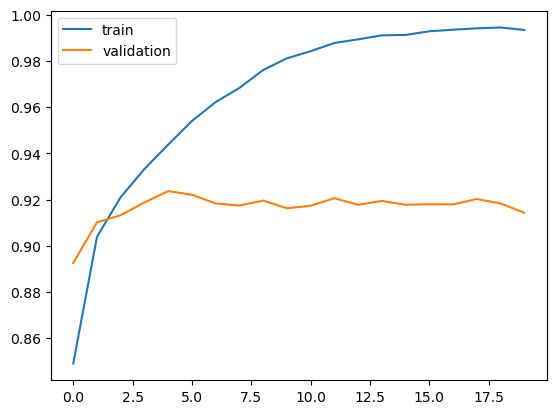

In [12]:
import matplotlib.pyplot as plt

def show_history(history):
    plt.plot(history.history['acc'], label='train')
    plt.plot(history.history['val_acc'], label='validation')
    plt.legend()
    plt.show()

show_history(history)

#### Dropout

In [13]:
from tensorflow.keras.layers import Flatten, Dense, Dropout

INPUT_SIZE = 28

input_tensor = Input(shape=(INPUT_SIZE, INPUT_SIZE, 1))

x = Conv2D(filters=32, kernel_size=3, strides=1, padding='same', activation='relu')(input_tensor)

x = Conv2D(filters=64, kernel_size=3, strides=1, activation='relu')(x)

x = MaxPooling2D(2)(x)

x = Flatten()(x)

x = Dropout(rate=0.5)(x)

x = Dense(50, activation='relu')(x)

output = Dense(10, activation='softmax')(x)

model = Model(inputs=input_tensor, outputs=output)
model.summary()

Model: "functional_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_7 (InputLayer)           │ (None, 28, 28, 1)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_12 (Conv2D)                   │ (None, 28, 28, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_13 (Conv2D)                   │ (None, 26, 26, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_6 (MaxPooling2D)       │ (None, 13, 13, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_3 (Flatten)                  │ (None, 10816)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 10816)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 50)                  │         540,850 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 10)                  │             510 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 560,176 (2.14 MB)

 Trainable params: 560,176 (2.14 MB)

 Non-trainable params: 0 (0.00 B)

In [14]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import CategoricalCrossentropy

model.compile(optimizer=Adam(), loss=CategoricalCrossentropy(), metrics=['acc'])

In [15]:
history = model.fit(x=train_images, 
                    y=train_oh_targets, 
                    batch_size=64, 
                    epochs=20, 
                    validation_data=(validation_images, validation_oh_targets))

Epoch 1/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 14s 17ms/step - acc: 0.7728 - loss: 0.6400 - val_acc: 0.8891 - val_loss: 0.3100
Epoch 2/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 12s 17ms/step - acc: 0.8909 - loss: 0.3078 - val_acc: 0.9038 - val_loss: 0.2695
Epoch 3/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 13s 17ms/step - acc: 0.9036 - loss: 0.2613 - val_acc: 0.9099 - val_loss: 0.2475
Epoch 4/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 13s 18ms/step - acc: 0.9154 - loss: 0.2282 - val_acc: 0.9184 - val_loss: 0.2269
Epoch 5/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 13s 18ms/step - acc: 0.9257 - loss: 0.2003 - val_acc: 0.9222 - val_loss: 0.2104
Epoch 6/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 15s 20ms/step - acc: 0.9324 - loss: 0.1812 - val_acc: 0.9223 - val_loss: 0.2201
Epoch 7/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 30s 39ms/step - acc: 0.9410 - loss: 0.1582 - val_acc: 0.9243 - val_loss: 0.2178
Epoch 8/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 23s 30ms/step - acc: 0.9454 - loss: 0.1475 - val_acc: 0.9210 - val_loss: 0.2252
Epoch 9/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 

In [18]:
model.evaluate(test_images, test_oh_targets, batch_size=256, verbose=1)

40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - acc: 0.9229 - loss: 0.2907


[0.2849765419960022, 0.9251999855041504]

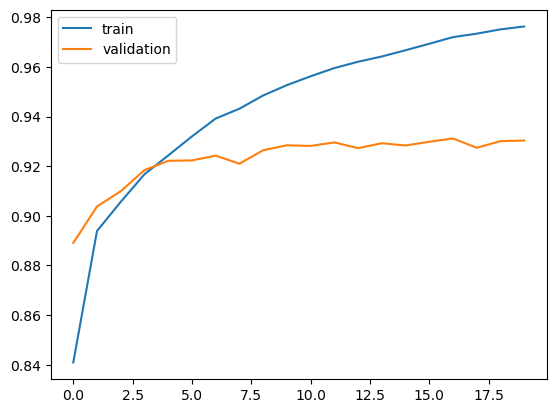

In [17]:
import matplotlib.pyplot as plt

def show_history(history):
    plt.plot(history.history['acc'], label='train')
    plt.plot(history.history['val_acc'], label='validation')
    plt.legend()
    plt.show()

show_history(history)

In [ ]:
import tensorflow as tf

print("Num GPUs Available: ", len(tf.config.experimental.list_physical_devi